In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df.head()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,Female,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,Male,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,Female,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,Male,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0


In [4]:
df.isnull().sum() 

Gender       0
Age          0
NS1          0
IgG          0
IgM          0
Area         0
AreaType     0
HouseType    0
District     0
Outcome      0
dtype: int64

In [5]:
df.shape 

(1000, 10)

Text(0, 0.5, 'Frequency')

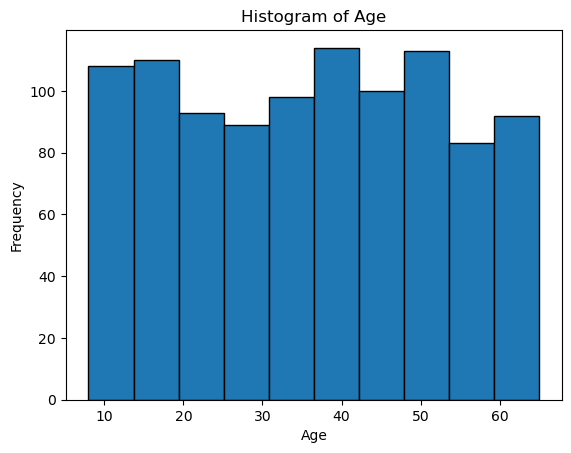

In [6]:
plt.hist(df['Age'],bins=10,edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency') 

In [7]:
unique_value_area=df['Area'].unique()
unique_value_area

array(['Mirpur', 'Chawkbazar', 'Paltan', 'Motijheel', 'Gendaria',
       'Dhanmondi', 'New Market', 'Sher-e-Bangla Nagar', 'Kafrul',
       'Pallabi', 'Mohammadpur', 'Shahbagh', 'Shyampur', 'Kalabagan',
       'Bosila', 'Jatrabari', 'Adabor', 'Kamrangirchar', 'Biman Bandar',
       'Ramna', 'Badda', 'Bangshal', 'Sabujbagh', 'Hazaribagh',
       'Sutrapur', 'Lalbagh', 'Demra', 'Banasree', 'Cantonment',
       'Keraniganj', 'Tejgaon', 'Khilkhet', 'Kadamtali', 'Gulshan',
       'Rampura', 'Khilgaon'], dtype=object)

In [8]:
area_count=df['Area'].value_counts()

In [9]:
area_count 

Jatrabari              38
Demra                  38
Mirpur                 34
Kadamtali              34
Dhanmondi              34
Bangshal               34
New Market             33
Keraniganj             33
Paltan                 31
Tejgaon                31
Sutrapur               31
Badda                  31
Rampura                30
Khilkhet               30
Ramna                  30
Biman Bandar           30
Banasree               29
Mohammadpur            28
Gulshan                28
Motijheel              27
Kalabagan              27
Kafrul                 26
Kamrangirchar          26
Hazaribagh             25
Bosila                 24
Shahbagh               24
Pallabi                23
Sher-e-Bangla Nagar    23
Khilgaon               23
Sabujbagh              23
Gendaria               22
Chawkbazar             22
Adabor                 22
Cantonment             20
Shyampur               19
Lalbagh                17
Name: Area, dtype: int64

<AxesSubplot:>

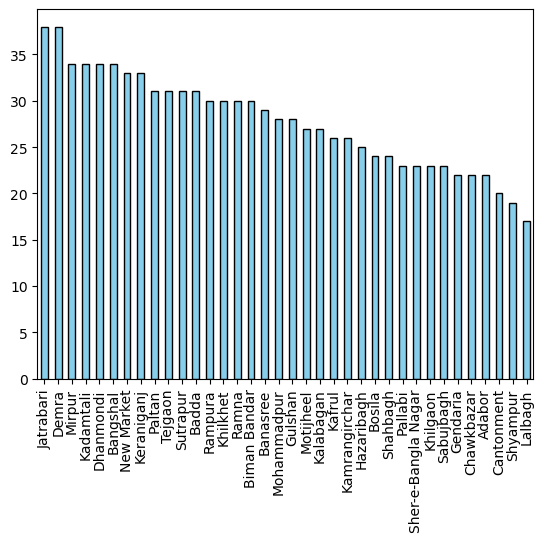

In [10]:
area_count.plot(kind='bar',color='skyblue',edgecolor='black') 

In [11]:
area_type=df['AreaType'].value_counts() 

In [12]:
area_type 

Developed      501
Undeveloped    499
Name: AreaType, dtype: int64

<AxesSubplot:ylabel='AreaType'>

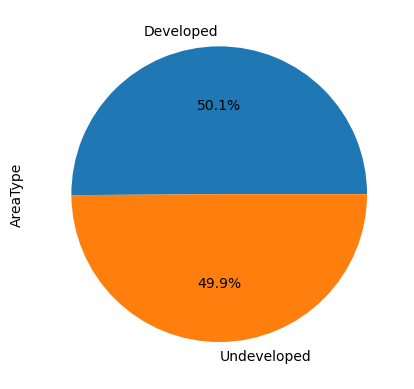

In [13]:
area_type.plot(kind='pie',autopct='%1.1f%%')

In [14]:
house_type=df['HouseType'].value_counts()

In [15]:
house_type

Building    354
Other       329
Tinshed     317
Name: HouseType, dtype: int64

<AxesSubplot:>

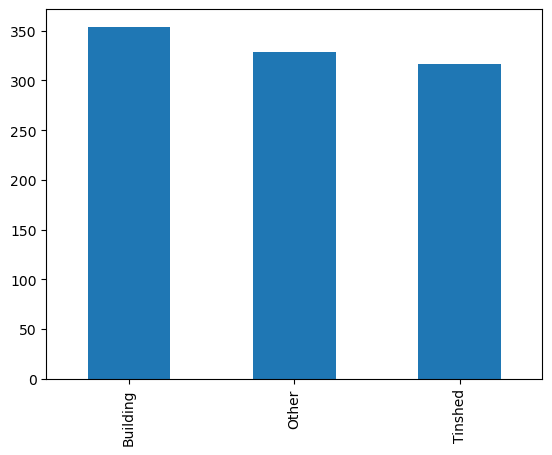

In [16]:
house_type.plot(kind='bar')

Now we will see depending on Area, AreaType and HouseType how many people has been affected to Dengue or not. The dengue affected are shown as 1 and non-affected as 0

In [17]:
area_outcome_counts = df.groupby(['Area', 'Outcome']).size().unstack()

In [18]:
area_outcome_counts 

Outcome,0,1
Area,,
Adabor,8,14
Badda,14,17
Banasree,19,10
Bangshal,10,24
Biman Bandar,18,12
Bosila,13,11
Cantonment,8,12
Chawkbazar,11,11
Demra,12,26


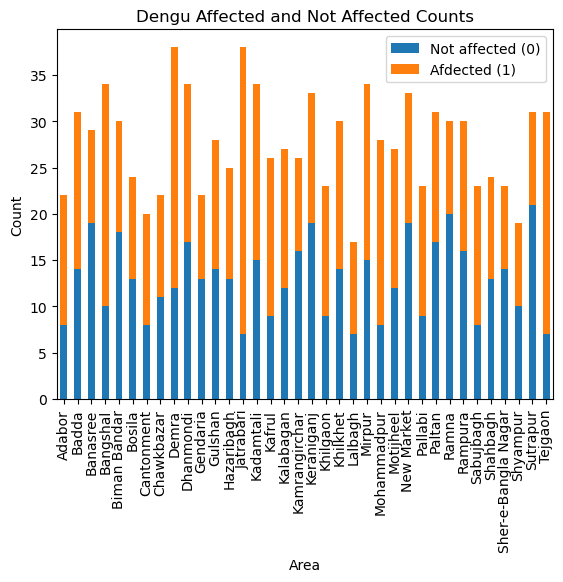

In [19]:
area_outcome_counts.plot(kind='bar',stacked='True')  
plt.title('Dengu Affected and Not Affected Counts')
plt.xlabel('Area')
plt.ylabel('Count')
plt.legend(labels=['Not affected (0)','Afdected (1)'],loc='upper right') 

In [20]:
area_type_outcome_counts = df.groupby(['AreaType', 'Outcome']).size().unstack()

In [21]:
area_type_outcome_counts 

Outcome,0,1
AreaType,,
Developed,244,257
Undeveloped,223,276


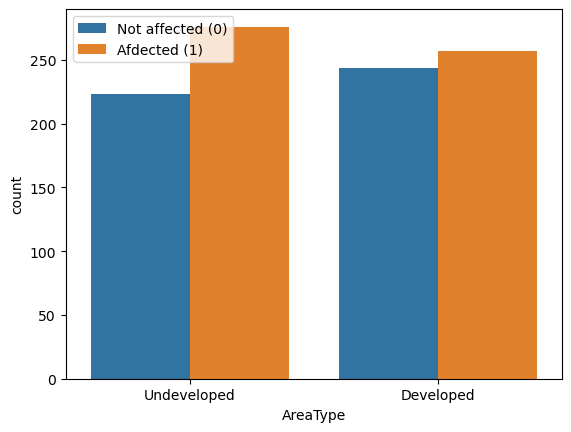

In [22]:
sns.countplot(x='AreaType', hue='Outcome', data=df) 
plt.legend(labels=['Not affected (0)','Afdected (1)'],loc='upper left')

 Dengue Affected people number greater than 15 from which areas

In [23]:
area_outcome_counts_filtered = area_outcome_counts[area_outcome_counts[1] > 15] 
area_outcome_counts_filtered 

Outcome,0,1
Area,,
Badda,14,17
Bangshal,10,24
Demra,12,26
Dhanmondi,17,17
Jatrabari,7,31
Kadamtali,15,19
Kafrul,9,17
Khilkhet,14,16
Mirpur,15,19


<AxesSubplot:xlabel='Area'>

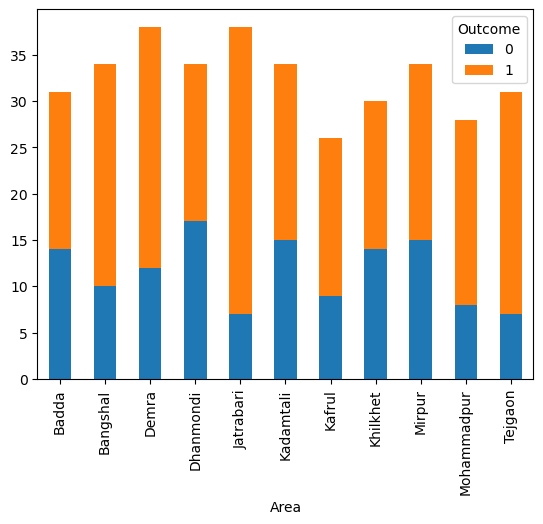

In [24]:
area_outcome_counts_filtered.plot(kind='bar',stacked='True')

In [25]:
dengu_affected=df[df['Outcome']==1]  

In [26]:
dengu_affected 

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
10,Female,31,1,1,0,Kafrul,Undeveloped,Building,Dhaka,1
12,Female,13,1,1,0,Pallabi,Undeveloped,Building,Dhaka,1
13,Female,43,1,1,0,Mohammadpur,Developed,Building,Dhaka,1
15,Female,12,1,1,1,Shyampur,Developed,Tinshed,Dhaka,1
...,...,...,...,...,...,...,...,...,...,...
990,Female,37,1,1,1,Jatrabari,Undeveloped,Other,Dhaka,1
992,Male,18,1,1,0,Kafrul,Undeveloped,Building,Dhaka,1
995,Female,16,1,1,0,New Market,Developed,Building,Dhaka,1
996,Male,41,1,1,0,Paltan,Undeveloped,Other,Dhaka,1


In [27]:
area_area_type=df.groupby(['Area','AreaType']).size().unstack() 

In [28]:
area_area_type 

AreaType,Developed,Undeveloped
Area,,
Adabor,12,10
Badda,13,18
Banasree,16,13
Bangshal,16,18
Biman Bandar,19,11
Bosila,13,11
Cantonment,14,6
Chawkbazar,11,11
Demra,22,16


In [29]:
area_area=dengu_affected.groupby(['Area','AreaType']).size().unstack() 

In [30]:
area_area

AreaType,Developed,Undeveloped
Area,,
Adabor,6,8
Badda,8,9
Banasree,6,4
Bangshal,11,13
Biman Bandar,8,4
Bosila,6,5
Cantonment,7,5
Chawkbazar,6,5
Demra,14,12


Text(0, 0.5, 'Count')

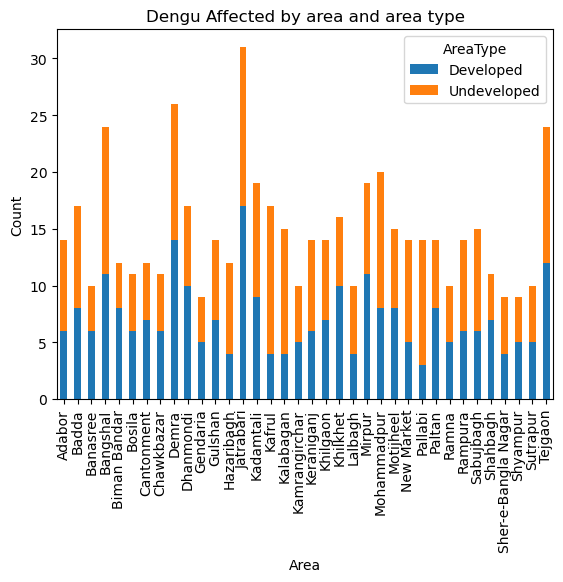

In [31]:
area_area.plot(kind='bar',stacked='True') 
plt.title('Dengu Affected by area and area type')
plt.xlabel('Area')
plt.ylabel('Count') 

Preprocessing

In [32]:
df['Gender']=df['Gender'].replace({'Male':1,'Female':0}) 

In [33]:
df.head()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,0,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,1,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,0,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,0,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,1,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0


LevelEncoding for Area col

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
 dummies=pd.get_dummies(df,columns=['Area','AreaType','HouseType','District'],prefix=['Area','AreaType','HouseType','District'])

In [37]:
dummies 

,Gender,Age,NS1,IgG,IgM,Outcome,Area_Adabor,Area_Badda,Area_Banasree,Area_Bangshal,...,Area_Sher-e-Bangla Nagar,Area_Shyampur,Area_Sutrapur,Area_Tejgaon,AreaType_Developed,AreaType_Undeveloped,HouseType_Building,HouseType_Other,HouseType_Tinshed,District_Dhaka
0,0,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,1,17,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,0,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,0,63,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,1,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,16,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
996,1,41,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
997,1,45,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
998,0,19,1,1,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [38]:
dataset=dummies.copy() 

In [39]:
dataset 

,Gender,Age,NS1,IgG,IgM,Outcome,Area_Adabor,Area_Badda,Area_Banasree,Area_Bangshal,...,Area_Sher-e-Bangla Nagar,Area_Shyampur,Area_Sutrapur,Area_Tejgaon,AreaType_Developed,AreaType_Undeveloped,HouseType_Building,HouseType_Other,HouseType_Tinshed,District_Dhaka
0,0,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,1,17,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,0,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,0,63,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,1,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,16,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
996,1,41,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
997,1,45,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
998,0,19,1,1,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


Now Apply Machine learning Algorithm

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x=dataset.drop('Outcome',axis=1)
y=dataset['Outcome']

In [42]:
x.head()

,Gender,Age,NS1,IgG,IgM,Area_Adabor,Area_Badda,Area_Banasree,Area_Bangshal,Area_Biman Bandar,...,Area_Sher-e-Bangla Nagar,Area_Shyampur,Area_Sutrapur,Area_Tejgaon,AreaType_Developed,AreaType_Undeveloped,HouseType_Building,HouseType_Other,HouseType_Tinshed,District_Dhaka
0,0,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,1,17,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,0,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,0,63,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,1,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [43]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Outcome, dtype: int64

In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1) 

In [45]:
xtrain

,Gender,Age,NS1,IgG,IgM,Area_Adabor,Area_Badda,Area_Banasree,Area_Bangshal,Area_Biman Bandar,...,Area_Sher-e-Bangla Nagar,Area_Shyampur,Area_Sutrapur,Area_Tejgaon,AreaType_Developed,AreaType_Undeveloped,HouseType_Building,HouseType_Other,HouseType_Tinshed,District_Dhaka
731,1,35,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
716,1,30,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
640,0,48,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
804,1,39,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
737,1,56,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,1,10,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
72,0,45,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
908,1,60,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
235,0,42,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [46]:
xtest

,Gender,Age,NS1,IgG,IgM,Area_Adabor,Area_Badda,Area_Banasree,Area_Bangshal,Area_Biman Bandar,...,Area_Sher-e-Bangla Nagar,Area_Shyampur,Area_Sutrapur,Area_Tejgaon,AreaType_Developed,AreaType_Undeveloped,HouseType_Building,HouseType_Other,HouseType_Tinshed,District_Dhaka
507,1,37,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
818,0,37,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
452,1,45,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
368,0,51,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
242,0,12,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,0,52,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
415,1,57,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
61,0,65,1,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
347,0,40,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [48]:
clf=RandomForestClassifier() 

In [49]:
clf.fit(xtrain,ytrain) 

RandomForestClassifier()

In [50]:
prediction=clf.predict(xtest) 

In [53]:
accuracy=accuracy_score(prediction,ytest) 

In [54]:
accuracy 

1.0

In [55]:
prediction

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1], d

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
conf_mat=confusion_matrix(ytest,prediction)

Text(0.5, 1.0, 'Confusion matrix')

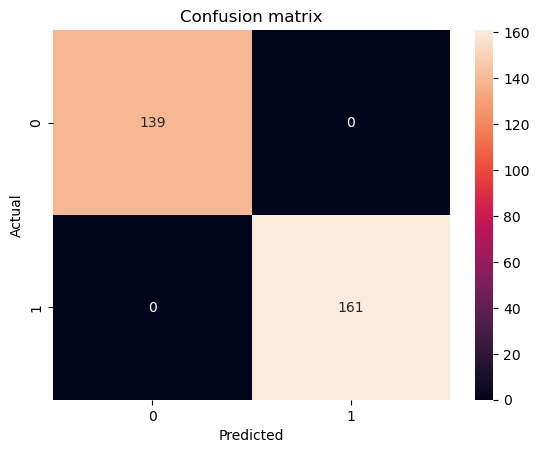

In [64]:
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix') 